# Setlist learning Categorization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_b = pd.read_csv("/Users/santiago/ih-bootcamp/proyectos/sherpa/out/spoty/bonobo_spoty.csv", index_col=0)
df_o = pd.read_csv("/Users/santiago/ih-bootcamp/proyectos/sherpa/out/spoty/objekt_spoty.csv", index_col=0)
df_d = pd.read_csv("/Users/santiago/ih-bootcamp/proyectos/sherpa/out/spoty/djrum_spoty.csv", index_col=0)

In [40]:
df_d.corr()['n_track']

index              1.000000
n_track            1.000000
set_section             NaN
duration           0.063503
tempo             -0.661570
energy            -0.199688
danceability      -0.127862
valence            0.390089
key                0.050981
time_signature    -0.303795
acousticness       0.167551
instruentalness   -0.202970
mode               0.101078
na                 0.369548
Name: n_track, dtype: float64

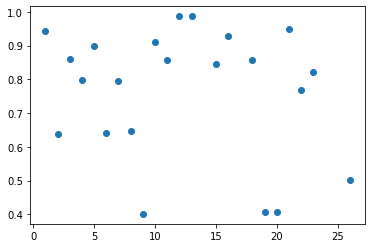

In [43]:
plt.scatter(df_d.n_track, df_d.energy)

In [34]:
df=pd.concat([df_b, df_o, df_d])

In [7]:
df=df_d

In [8]:
df.reset_index(inplace=True)

In [9]:
df=df.iloc[:,1:]

In [10]:
df.columns

Index(['n_track', 'set_section', 'artist', 'track', 'set_name', 'song_id',
       'album', 'duration', 'tempo', 'energy', 'danceability', 'valence',
       'key', 'time_signature', 'acousticness', 'instruentalness', 'mode',
       'na'],
      dtype='object')

In [14]:
df_copy=df.copy()

In [15]:
df_copy.drop(['set_section', 'artist', 'track', 'set_name','key', 'na', 'song_id', 'album'], axis=1, inplace=True)

In [27]:
df_copy.dropna(inplace=True)

In [28]:
df_copy.head()

,n_track,duration,tempo,energy,danceability,valence,time_signature,acousticness,instruentalness,mode
0,1,3.181617,157.109,0.942,0.690,0.4960,5.0,0.174000,0.873,1.0
1,2,5.377000,171.952,0.637,0.747,0.0727,4.0,0.073300,0.902,0.0
2,3,10.589750,169.984,0.861,0.538,0.1670,4.0,0.077000,0.658,1.0
3,4,5.189383,165.000,0.798,0.577,0.2620,4.0,0.031100,0.866,1.0
4,5,4.500000,159.986,0.898,0.587,0.1310,4.0,0.000034,0.395,1.0


In [16]:
df.n_track.value_counts()

2     12
9     11
5     11
6     10
1      9
13     9
12     9
14     9
8      9
4      9
7      8
17     8
10     8
19     7
3      7
15     7
16     7
23     6
18     6
11     6
20     5
25     5
21     4
24     4
22     3
27     3
26     2
Name: n_track, dtype: int64

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   n_track          194 non-null    int64  
 1   duration         194 non-null    float64
 2   tempo            194 non-null    float64
 3   energy           194 non-null    float64
 4   danceability     194 non-null    float64
 5   valence          194 non-null    float64
 6   acousticness     194 non-null    float64
 7   instruentalness  194 non-null    float64
 8   mode             194 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 13.8 KB


# Modelos

In [ ]:
# División de data

In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
y = df_copy['n_track']
X = df_copy.drop(columns='n_track', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

In [30]:
oversample = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)


## Random Forest

In [31]:

rf = RandomForestClassifier()

params = {'max_depth' : [10, 20, 30], 'n_estimators':[100, 500, 1000]}

gsrf = GridSearchCV(rf, params)

In [32]:
gsrf.fit(X_train_over, y_train_over)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [33]:
gsrf.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [67]:
rfbe = RandomForestClassifier(max_depth=20,random_state=2)

In [68]:
rfbe.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=20, random_state=2)

In [69]:
predic = rfbe.predict(X_test)

In [70]:
result= y_test == predic

In [71]:
predic[0]

10

In [72]:
cercanias = []
for i in range(len(predic)):

    cercanias.append(predic[i] in range(list(y_test)[i]-4, list(y_test)[i]+4))

In [73]:
predic

array([10,  2, 38, 17,  8,  7,  2, 43, 56,  8,  5,  2, 35, 11,  4, 62, 43,
       13,  8, 36, 11, 16, 15, 18, 51, 26, 26,  9,  2,  2, 30, 10, 12, 31,
       15, 21,  9, 34, 15, 38, 34, 16, 18,  6, 10,  5,  2, 19, 20, 24,  5,
       13, 10, 32, 33,  2, 17,  5,  4,  9, 18, 26,  5, 17,  4, 42,  2, 31,
       59, 13, 25, 26, 11,  8,  9, 15, 15, 56, 15, 59,  9,  2, 41,  7, 13,
        2,  8, 15, 19, 11, 11, 29,  4, 15, 16, 15, 12,  6, 21, 28, 19,  6,
       18, 16, 20,  7,  8,  2, 21, 39, 17, 17, 26, 15, 18, 13, 15,  8, 17,
       32, 25, 16, 31, 10, 38, 38, 16, 20, 31, 22, 18,  5, 10, 21, 10, 23,
       26, 44,  4, 15, 32, 18])

In [74]:
print(list(y_test))

[10, 19, 28, 11, 14, 5, 4, 31, 1, 5, 1, 9, 44, 5, 11, 14, 10, 15, 12, 12, 9, 19, 8, 41, 58, 23, 18, 13, 17, 15, 42, 22, 27, 27, 5, 39, 2, 4, 25, 5, 40, 30, 31, 13, 4, 9, 22, 16, 5, 1, 8, 17, 13, 15, 8, 2, 14, 13, 44, 16, 13, 29, 14, 31, 30, 42, 24, 14, 38, 12, 12, 11, 25, 7, 25, 29, 10, 28, 18, 2, 26, 3, 2, 15, 4, 3, 53, 1, 15, 22, 2, 14, 8, 23, 34, 17, 3, 15, 27, 23, 35, 32, 19, 3, 5, 9, 3, 7, 8, 17, 8, 44, 2, 18, 7, 6, 35, 4, 17, 20, 3, 1, 40, 19, 32, 1, 20, 19, 4, 9, 7, 7, 13, 12, 1, 6, 24, 4, 5, 4, 18, 15]


In [88]:
sum(cercanias)/len(cercanias)*100

26.056338028169012

## xgboost

In [1]:
import xgboost as xgb

In [44]:
dtrain = xgb.DMatrix(X_train_over, label=y_train_over)
dtest = xgb.DMatrix(X_test, label=y_test)

In [46]:
param = {}
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [47]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)


[0]	eval-rmse:15.85676	train-rmse:26.08367
[1]	eval-rmse:13.66860	train-rmse:20.24494
[2]	eval-rmse:13.26365	train-rmse:16.52276
[3]	eval-rmse:13.38046	train-rmse:14.12170
[4]	eval-rmse:13.91196	train-rmse:12.70999
[5]	eval-rmse:14.32532	train-rmse:11.86121
[6]	eval-rmse:14.73740	train-rmse:11.40289
[7]	eval-rmse:15.04085	train-rmse:11.11478
[8]	eval-rmse:15.22750	train-rmse:10.95937
[9]	eval-rmse:15.42675	train-rmse:10.86381


In [51]:
bst.attributes()

{'best_iteration': '9', 'best_ntree_limit': '10'}

In [48]:
bst.predict(dtest)

array([12.946168 , 13.782652 , 32.308712 , 32.308712 , 16.144972 ,
       32.308712 , 32.308712 , 44.012386 , 15.211263 , 24.877266 ,
       32.308712 , 13.645826 , 15.574531 , 32.308712 , 32.308712 ,
        5.972682 , 32.308712 , 24.852932 , 13.017158 , 20.025665 ,
       23.17537  , 14.85803  , 11.386264 , 32.308712 , 32.308712 ,
        7.807006 , 32.308712 , 22.364054 , 14.656284 , 18.136948 ,
       35.504513 ,  7.5792236,  9.922652 , 32.308712 , 14.734141 ,
       32.308712 , 32.308712 , 15.574128 , 32.308712 , 32.308712 ,
       25.833723 , 16.34092  , 16.802582 , 14.220719 , 32.308712 ,
       17.039846 , 17.531242 , 21.530464 , 18.673244 , 31.755854 ,
       13.30707  , 32.308712 , 18.848064 , 30.025972 , 26.704668 ,
       45.44603  , 10.785038 ,  7.000137 , 16.840702 , 37.211273 ,
       32.308712 , 10.013736 , 32.308712 , 32.308712 , 12.23055  ,
       32.308712 , 32.308712 , 32.308712 , 11.743119 , 17.02114  ,
       32.308712 , 18.8963   , 11.755283 , 22.886791 , 32.3087

In [49]:
y_test

864    29
370    20
147    18
120    17
333    18
       ..
292     6
200    20
721    17
150    21
211     4
Name: n_track, Length: 201, dtype: int64

In [33]:
df

,n_track,set_section,artist,track,set_name,song_id,album,duration,tempo,energy,danceability,valence,key,time_signature,acousticness,instruentalness,mode,na
0,1,1,Bonobo,Cirrus,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,2lJ4d8MCT6ZlDRHKJ1br14,The North Borders,5.870767,119.042,0.844,0.640,0.3640,2.0,4.0,0.39500,0.933,0.0,False
1,2,1,Eliphino,More Than Me,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,20ieXcjQBv4ePXkWxhvKPV,More Than Me,7.019933,117.994,0.714,0.851,0.4140,9.0,4.0,0.00383,0.380,0.0,False
2,3,1,FaltyDL,Straight And Arrow,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,7G2ws9VEzcZk51nnp4xuYu,Straight & Arrow,3.464333,130.038,0.723,0.791,0.1320,8.0,4.0,0.00106,0.767,1.0,False
3,4,1,Rocketnumbernine,Matthew And Toby (Four Tet Remix),2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,6KuF6uqMIvaafrF1LCWcEg,Dubfire - A Transmission,9.784000,125.007,0.483,0.744,0.2810,7.0,4.0,0.57200,0.940,1.0,False
4,5,1,Bonobo,Sapphire,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,1d5hX0RYHcDM4aHJHSm5cr,The North Borders,4.795467,135.024,0.631,0.641,0.0549,0.0,4.0,0.04800,0.612,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,22,1,Djrum,Showreel Pt. 2,"2017-11-20 - Bonobo - Outlier Radio, NTS Radio",4Tg0ra2NwFahHXiboKtfPW,"Showreel, Pt. 2",9.023783,92.635,0.787,0.274,0.1430,8.0,3.0,0.06000,0.689,1.0,False
190,23,1,Appleblim,Sacred Rowan Grove,"2017-11-20 - Bonobo - Outlier Radio, NTS Radio",34bMRysVmX1E2nBu9YjAsh,Displaced Soundtracks,5.373217,120.047,0.905,0.423,0.3520,8.0,4.0,0.08900,0.694,1.0,False
191,24,1,Agnes Obel,Stretch Your Eyes (Quiet Village Remix),"2017-11-20 - Bonobo - Outlier Radio, NTS Radio",06xHJ8x3p0Kaw1zYfevxSA,Stretch Your Eyes (Quiet Village Remix),9.436550,120.004,0.413,0.579,0.0386,6.0,4.0,0.43600,0.899,0.0,False
192,25,1,Penya,Why So Angry,"2017-11-20 - Bonobo - Outlier Radio, NTS Radio",7FLWpgPAF99CZvGcNBGwGU,Super Liminal,4.195517,125.019,0.726,0.700,0.2100,6.0,4.0,0.19500,0.693,0.0,False


## Modelos distancias

In [12]:
df = pd.read_csv("/Users/santiago/ih-bootcamp/proyectos/sherpa/out/df_modelo_medias.csv", index_col=0)

In [13]:
df

,n_track,set_name,song_id,tempo,energy,danceability,dj,m_energy,m_danceability,m_tempo,d_energy,d_danceability,d_tempo,grupo_set,tempo_media_g,energy_media_g,danceability_media_g,d_energy_grupo,d_danceability_grupo,d_tempo_grupo
0,1,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,2lJ4d8MCT6ZlDRHKJ1br14,0.459016,0.844,0.640,bonobo,0.676727,0.697273,0.479881,-0.167273,0.057273,0.020864,1,0.480874,0.691000,0.756500,-0.153000,0.116500,0.021858
1,2,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,20ieXcjQBv4ePXkWxhvKPV,0.453552,0.714,0.851,bonobo,0.676727,0.697273,0.479881,-0.037273,-0.153727,0.026329,1,0.480874,0.691000,0.756500,-0.023000,-0.094500,0.027322
2,3,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,7G2ws9VEzcZk51nnp4xuYu,0.519126,0.723,0.791,bonobo,0.676727,0.697273,0.479881,-0.046273,-0.093727,-0.039245,1,0.480874,0.691000,0.756500,-0.032000,-0.034500,-0.038251
3,4,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,6KuF6uqMIvaafrF1LCWcEg,0.491803,0.483,0.744,bonobo,0.676727,0.697273,0.479881,0.193727,-0.046727,-0.011923,1,0.480874,0.691000,0.756500,0.208000,0.012500,-0.010929
4,5,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,1d5hX0RYHcDM4aHJHSm5cr,0.546448,0.631,0.641,bonobo,0.676727,0.697273,0.479881,0.045727,0.056273,-0.066567,2,0.520947,0.730667,0.638667,0.099667,-0.002333,-0.025501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,11,2020-09-30 - Skee Mask - Tsugi Podcast 602,0RPvcGxPrIm6jba1z9HWc9,0.382514,0.702,0.842,skee mask,0.846000,0.650778,0.564663,0.144000,-0.191222,0.182149,2,0.506375,0.825667,0.795667,0.123667,-0.046333,0.123862
657,12,2020-09-30 - Skee Mask - Tsugi Podcast 602,7IRbMtmzqH5pHhsZ6Qpx19,0.562842,0.783,0.800,skee mask,0.846000,0.650778,0.564663,0.063000,-0.149222,0.001821,2,0.506375,0.825667,0.795667,0.042667,-0.004333,-0.056466
658,16,2020-09-30 - Skee Mask - Tsugi Podcast 602,2K21TUAQbrD4AA1V4x4mUS,0.530055,0.995,0.612,skee mask,0.846000,0.650778,0.564663,-0.149000,0.038778,0.034608,3,0.637523,0.782667,0.440000,-0.212333,-0.172000,0.107468
659,23,2020-09-30 - Skee Mask - Tsugi Podcast 602,1wO8HOEDJxLtxe6XZo1PAD,0.562842,0.938,0.602,skee mask,0.846000,0.650778,0.564663,-0.092000,0.048778,0.001821,3,0.637523,0.782667,0.440000,-0.155333,-0.162000,0.074681


In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
df_modelo = df[['n_track', 'set_name', 'd_energy', 'd_danceability', 'd_tempo', 'grupo_set', 'd_energy_grupo', 'd_danceability_grupo', 'd_tempo_grupo']]

In [20]:
from feature_engine.encoding import OrdinalEncoder

In [24]:
oe = OrdinalEncoder(encoding_method='ordered')

In [27]:
oe.fit_transform(pd.DataFrame(df_modelo.set_name))

ValueError: Please provide a target y for this encoding method

In [28]:
from sklearn import preprocessing

In [31]:
cate=df_modelo.set_name.unique()

In [33]:
oe=preprocessing.OrdinalEncoder(categories = cate)

In [30]:
df_modelo.head()

,n_track,set_name,d_energy,d_danceability,d_tempo,grupo_set,d_energy_grupo,d_danceability_grupo,d_tempo_grupo
0,1,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,-0.167273,0.057273,0.020864,1,-0.153000,0.116500,0.021858
1,2,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,-0.037273,-0.153727,0.026329,1,-0.023000,-0.094500,0.027322
2,3,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,-0.046273,-0.093727,-0.039245,1,-0.032000,-0.034500,-0.038251
3,4,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,0.193727,-0.046727,-0.011923,1,0.208000,0.012500,-0.010929
4,5,2012-02-08 - Bonobo @ Boiler Room 77 - Ninja T...,0.045727,0.056273,-0.066567,2,0.099667,-0.002333,-0.025501


In [41]:
df_modelo_grupo = df_modelo.iloc[:,2:6]

In [44]:
df_copy = df_modelo_grupo

In [45]:
df_copy.head()

,d_energy,d_danceability,d_tempo,grupo_set
0,-0.167273,0.057273,0.020864,1
1,-0.037273,-0.153727,0.026329,1
2,-0.046273,-0.093727,-0.039245,1
3,0.193727,-0.046727,-0.011923,1
4,0.045727,0.056273,-0.066567,2


In [47]:
df_copy.grupo_set.value_counts()

3    249
1    230
2    182
Name: grupo_set, dtype: int64

In [46]:
y = df_copy['grupo_set']
X = df_copy.drop(columns='grupo_set', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

oversample = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [48]:

rf = RandomForestClassifier()

params = {'max_depth' : [10, 20, 30], 'n_estimators':[100, 500, 1000]}

gsrf = GridSearchCV(rf, params)

gsrf.fit(X_train_over, y_train_over)

gsrf.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=1000)

In [49]:
rfbe = RandomForestClassifier(max_depth=30,random_state=1000)

In [50]:
rfbe.fit(X_train_over, y_train_over)
predic = rfbe.predict(X_test)

In [52]:
from sklearn.metrics import plot_confusion_matrix

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


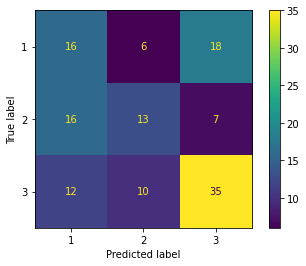

In [53]:
plot_confusion_matrix(rfbe, X_test, y_test)

In [60]:
df_5 = pd.read_csv("/Users/santiago/ih-bootcamp/proyectos/sherpa/out/df_modelo_medias_q50.csv", index_col=0)

In [64]:
df_5 = df_5[['n_track', 'set_name', 'd_energy', 'd_danceability', 'd_tempo', 'grupo_set', 'd_energy_grupo', 'd_danceability_grupo', 'd_tempo_grupo']]

In [67]:
df_5.iloc[:,2:6]

,d_energy,d_danceability,d_tempo,grupo_set
0,-0.167273,0.057273,0.020864,1
1,-0.037273,-0.153727,0.026329,1
2,-0.046273,-0.093727,-0.039245,1
3,0.193727,-0.046727,-0.011923,1
4,0.045727,0.056273,-0.066567,1
...,...,...,...,...
656,0.144000,-0.191222,0.182149,1
657,0.063000,-0.149222,0.001821,2
658,-0.149000,0.038778,0.034608,2
659,-0.092000,0.048778,0.001821,2


In [68]:
df_copy = df_5.iloc[:,2:6]
df_copy.head()

df_copy.grupo_set.value_counts()

y = df_copy['grupo_set']
X = df_copy.drop(columns='grupo_set', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

oversample = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [70]:
rf = RandomForestClassifier()

params = {'max_depth' : [10, 20, 30], 'n_estimators':[100, 500, 1000]}

gsrf = GridSearchCV(rf, params)

gsrf.fit(X_train_over, y_train_over)

gsrf.best_estimator_

RandomForestClassifier(max_depth=20)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


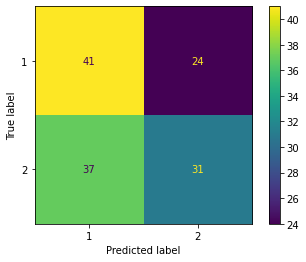

In [71]:
rfbe = RandomForestClassifier(max_depth=20)

rfbe.fit(X_train_over, y_train_over)
predic = rfbe.predict(X_test)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfbe, X_test, y_test)